

<h1 align='Center' style='color:red'> Heart Disease Prediction and Machine learning Model</h>
<img src="heart_image.jpg"  align='center' alt="Alternative text" />

Dataset link: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

According to the World Health Organization (WHO), heart disease, also known as cardiovascular disease, 
is one of the leading causes of death globally. This is equivalent to about 31% of global death.
Few risk factors for heart diseases include high blood pressure, high cholesterol, smoking, AlcoholDrinking, Kidney diseases, obesity, stoke, diabetes and others. 

importing Necessary Libraries

In [3]:
!pip install imblearn

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install seaborn

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
import warnings 
warnings.filterwarnings('ignore')

#moduel for data importation and preprocessing 
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn 
import numpy as np 
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
import shap

#import neccessary module for training the machine leanring algorithms  
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTEENN

In [2]:
#  file or folder in the current directory
os.listdir()

['.ipynb_checkpoints', 'heart_2020.csv', 'heart_disease_models.ipynb']

## importing dataset

In [3]:
# importing the heart diseases dataset from the local repository
dataset = pd.read_csv('heart_2020.csv')
# showing first 5 rows of datapset 
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


##  DATA Exploration, Preprocessing, Cleaning and transformation

In [4]:
# showing randomly any 5 sample within the dataset......
dataset.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
300957,No,20.97,No,No,No,0.0,0.0,No,Female,65-69,White,No,Yes,Very good,6.0,No,No,Yes
95009,No,30.81,Yes,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,7.0,No,No,No
268374,No,21.77,No,No,No,2.0,4.0,No,Male,35-39,White,No,Yes,Excellent,7.0,No,No,No
235791,No,24.68,No,No,No,0.0,0.0,No,Male,70-74,White,No,Yes,Very good,6.0,No,No,Yes
115541,No,19.49,No,No,No,20.0,0.0,Yes,Female,80 or older,White,No,Yes,Good,8.0,Yes,No,No


In [5]:
# showing last 5 row of the dataset
dataset.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [6]:
# using the shape attribute of the dataframe to get the number of rows and columns of the dataset 
row , col =  dataset.shape
print(f'Row (Datapoint) :     {row}  \nColumn (Attributes) : {col}')

Row (Datapoint) :     319795  
Column (Attributes) : 18


In [7]:
dataset.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
 #checking for any missing value 
dataset.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

it is revealed that there is no missing value in the dataset

In [9]:
# checking for duplicates
if dataset.duplicated().any():
    print("Duplicates found!")
else:
    print("No duplicates found.")


Duplicates found!


 It revealed that the dataset have duplicates

In [10]:
# create a boolean mask indicating which rows are duplicates
mask = dataset.duplicated()

# select only the duplicate rows using the mask
duplicate_rows = dataset[mask]

# print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
2182             No  19.85      No              No     No             0.0   
3182             No  28.19      No              No     No             0.0   
3397             No  26.54      No              No     No             0.0   
3650             No  32.89     Yes              No     No             2.0   
4061             No  25.84      No              No     No             0.0   
...             ...    ...     ...             ...    ...             ...   
319671           No  25.06      No              No     No             0.0   
319689           No  27.44      No              No     No             0.0   
319726           No  30.41      No              No     No             0.0   
319751           No  34.96      No              No     No             0.0   
319776           No  27.98      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      

  it is revealed that, there are 18078 duplicates rows

## Checking the unique attributes of the dataset

In [11]:
# showing all the attributes/columns/features present in the dataset.......
dataset.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

## Viewing Datatype, Numbers of Null in every Attribute

In [12]:
# showing the  essential information about the dataset using the info() method .... information reveal include  
# . columns
# . Non-Null : Number of Values 
# . Dtype : Data type 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

There are both numerical and categorical variables 

## viewing statistical data of the numerical attributes or columns

In [13]:
# this line of code reveal statistical information about the columns having numerical value 
# information such as the mean, standard diviation, the number of value, max value etc...
dataset.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


## Viewing Unique Value for each attribute

In [14]:
# a customize function is created to reveal unique value present in dataset by specifying the column index
# function creation
def get_uniques_val(df , col_index): 
    for col in col_index: 
        print(f'Uniques Entries (Value) in {df.columns[col]}')
        val = df[df.columns[col]].unique()
        print(val)
        print('_____________________________________________________')

# checking the numbers of unique value in the attribute

# function calling 
get_uniques_val(dataset, [0,2,3,4,7,8,9,10,11,12,13,15,16,17])

Uniques Entries (Value) in HeartDisease
['No' 'Yes']
_____________________________________________________
Uniques Entries (Value) in Smoking
['Yes' 'No']
_____________________________________________________
Uniques Entries (Value) in AlcoholDrinking
['No' 'Yes']
_____________________________________________________
Uniques Entries (Value) in Stroke
['No' 'Yes']
_____________________________________________________
Uniques Entries (Value) in DiffWalking
['No' 'Yes']
_____________________________________________________
Uniques Entries (Value) in Sex
['Female' 'Male']
_____________________________________________________
Uniques Entries (Value) in AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
_____________________________________________________
Uniques Entries (Value) in Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
_____________________________________________________


## Visualizaing the prediction (Yes = 1, No = 0) class using BAR CHART 

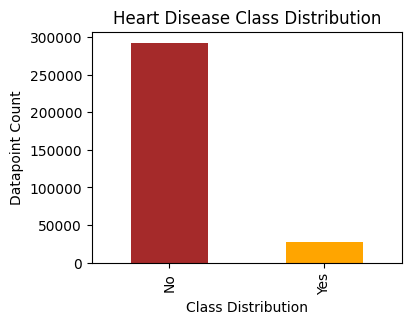

In [15]:
# loading dataset content to dt ... basically just chaining variable name to dt 
dt = dataset

# ploting the HeartDisease Attribut unique value count using bar chat
dt.HeartDisease.value_counts().plot(kind='bar', title= f'Heart Disease Class Distribution', color=['brown', 'orange'], figsize=(4,3))
plt.xlabel('Class Distribution')
plt.ylabel('Datapoint Count')
plt.show()

# the chart shows that the dataset is higly bais... 
# No (Patient not having Heart Dsieases) is about 300,000
# while patient with heart diseases is about 50,000

 The bar chart above shows that the dataset is unbalanced hence, data
 balancing techniques is important to avoid bias prediction ¶

In [16]:
# building a customize method to return uniques value of a column based on the threshold value 
# the threshold denote the condition of returning only columns with uniques value of size 2 (binary divided data)
attribute = 'HEART'
%matplotlib inline

def get_attribute_unique_threshold(df, treshold=2):
    columns = []
    size = []
    data = []
    for col in df.columns: 
        if df[col].unique().size <= treshold:
            size.append(df[col].unique().size)
            data.append(df[col].unique())
            columns.append(col)
            
    return columns, size, data

## Exploring Attribute that as uniques value below 20

In [17]:
# method is called with threashold of 20
attribute , size, data = get_attribute_unique_threshold(dt, 20)
data = {'Attribute': attribute, 'Unique Value': data , "Count": size}
att_df = pd.DataFrame(data)
att_df

,Attribute,Unique Value,Count
0,HeartDisease,"[No, Yes]",2
1,Smoking,"[Yes, No]",2
2,AlcoholDrinking,"[No, Yes]",2
3,Stroke,"[No, Yes]",2
4,DiffWalking,"[No, Yes]",2
5,Sex,"[Female, Male]",2
6,AgeCategory,"[55-59, 80 or older, 65-69, 75-79, 40-44, 70-7...",13
7,Race,"[White, Black, Asian, American Indian/Alaskan ...",6
8,Diabetic,"[Yes, No, No, borderline diabetes, Yes (during...",4
9,PhysicalActivity,"[Yes, No]",2


## Exploring Attribute that as uniques value below or equal 2

In [18]:
# method is called with threashold of 2
attribute , size, data = get_attribute_unique_threshold(dt, 2)
data = {'Attribute': attribute, 'Unique Value': data , "Count": size}
binary_attribute = pd.DataFrame(data)
binary_attribute

,Attribute,Unique Value,Count
0,HeartDisease,"[No, Yes]",2
1,Smoking,"[Yes, No]",2
2,AlcoholDrinking,"[No, Yes]",2
3,Stroke,"[No, Yes]",2
4,DiffWalking,"[No, Yes]",2
5,Sex,"[Female, Male]",2
6,PhysicalActivity,"[Yes, No]",2
7,Asthma,"[Yes, No]",2
8,KidneyDisease,"[No, Yes]",2
9,SkinCancer,"[Yes, No]",2


## visualizing heart diseases distribution with respect to Races

Text(0.5, 1.0, 'Variation of Heart Disease amoung Races')

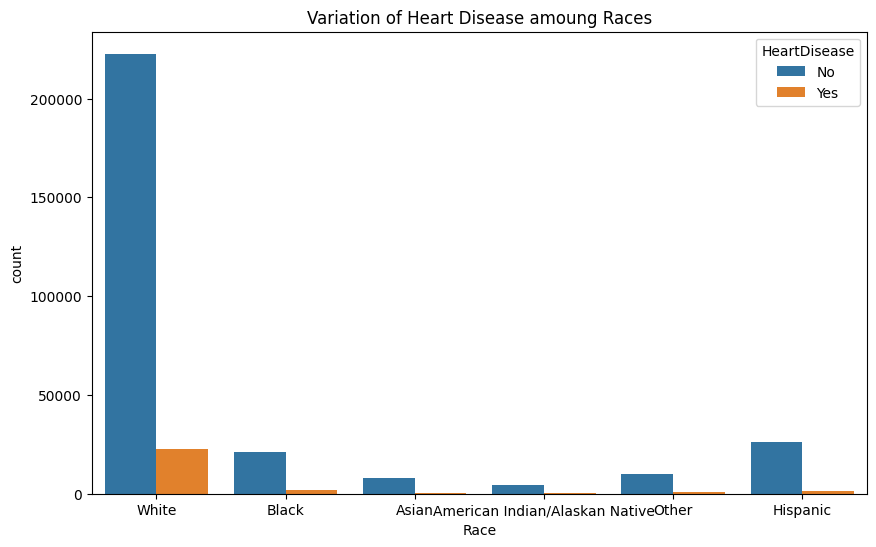

In [19]:
plt.figure(figsize=(10, 6))
sn.countplot(data= dataset, x=dataset['Race'], hue= dataset['HeartDisease'])
plt.title('Variation of Heart Disease amoung Races')

The chart reveals that white have higher risk of developing Heart Disease 

<Axes: xlabel='HeartDisease', ylabel='count'>

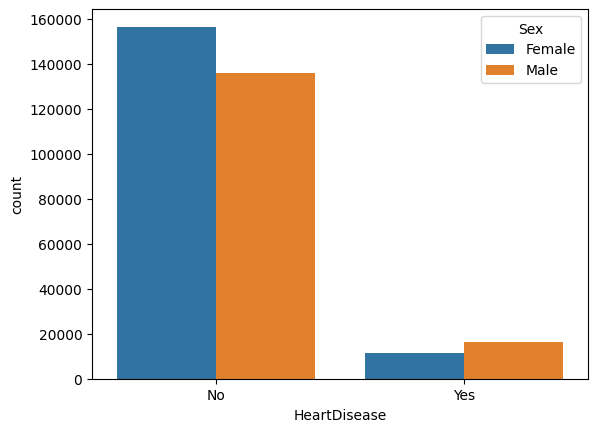

In [20]:
sn.countplot(x ='HeartDisease',hue ='Sex',  data= dt)

The chart reveals that Male have higher risk of developing Heart Disease than Female

<Axes: xlabel='HeartDisease', ylabel='count'>

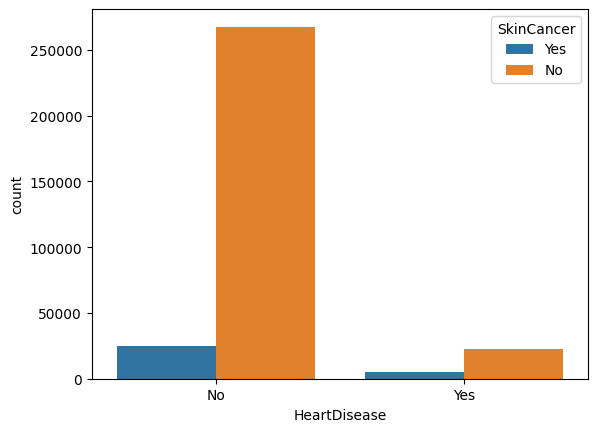

In [21]:
sn.countplot(x ='HeartDisease', hue ='SkinCancer', data = dt)

The chart reveals that Skincancer patients are at risk of having Heart Disease  

##  Viewing Percentage correlation of Binary Value Attributes 

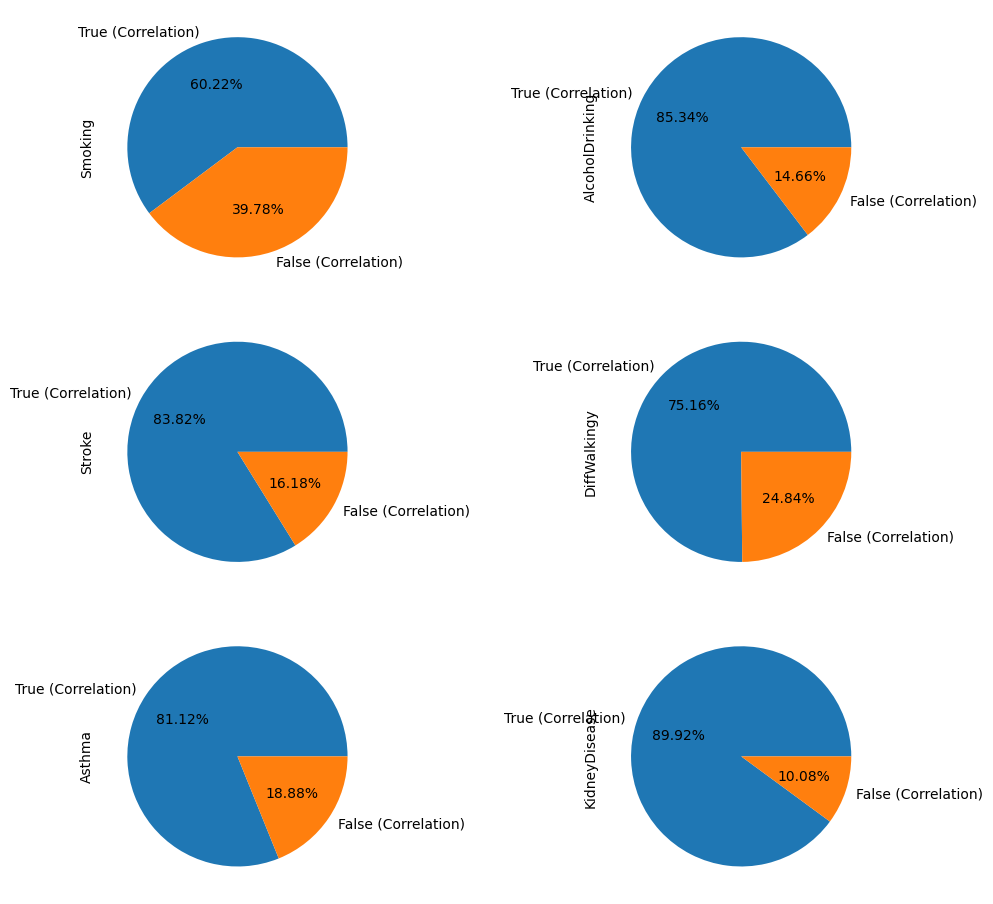

In [22]:
s1 =  pd.Series(dt['HeartDisease'].values == dt['Smoking'].values)
s2 =  pd.Series(dt['HeartDisease'].values == dt['AlcoholDrinking'].values)
s3 =  pd.Series(dt['HeartDisease'].values == dt['DiffWalking'].values)
s4 =  pd.Series(dt['HeartDisease'].values == dt['PhysicalActivity'].values)
s5 =  pd.Series(dt['HeartDisease'].values == dt['Asthma'].values)
s6 =  pd.Series(dt['HeartDisease'].values == dt['KidneyDisease'].values)
s7 =  pd.Series(dt['HeartDisease'].values == dt['Sex'].values)
s8 =  pd.Series(dt['HeartDisease'].values == dt['Stroke'].values)
s9 =  pd.Series(dt['HeartDisease'].values == dt['SkinCancer'].values)


data_distribution = pd.DataFrame({'Smoking':s1, 'AlcoholDrinking':s2, 'Stroke':s3, 'DiffWalkingy':s4, 'Asthma':s5 , 'KidneyDisease':s6, })
data_distribution
for index in range(6): 
    plt.subplot(4,2, (index+1))
    plt.tight_layout(pad=0.4)
    colors = (np.random.random(), np.random.random(), np.random.random())
    data_distribution[data_distribution.columns[index]].value_counts().plot(kind='pie',  \
                          autopct='%.2f%%', labels=['True (Correlation)', 'False (Correlation)'] , figsize=(10, 12))
    

    # the correlation of heart disease is measured against the following attribute with binary categorical value
    # . smoking
    # . AlcoholDrinking
    # . DiffWalking
    # . PhysicalActivity
    # . Asthma
    # . KidneyDisease


    # kidney diseases has highest correlation of 89.92% as shown in the pie chart below 

## the correlation of heart disease is measured against the following attribute with binary categorical value                      
     . smoking
     . AlcoholDrinking
     . DiffWalking
     . stroke
     . Asthma
     . KidneyDisease
     
 The Observation Made on Data Correlation reveal the following.
      

. Patients with kidney disease have 89.92% risk of having Heart Disease than Asthmatic patient with 81.12% <br>
. An Alcholic patient has high risk of (85.34) of having heart Disease <br>
. for patients who have difficuty in walking there is 83.82% risk of having heart dieseas <br>
. Smokers have 60.22% risk of having Heart Dieases <br>
. There is 83.82%  risk of having Heart Disease if the patient have stroke than Asthma which have 81.12% <br>

## Checking correlation using confusion matrix of Numerical features 

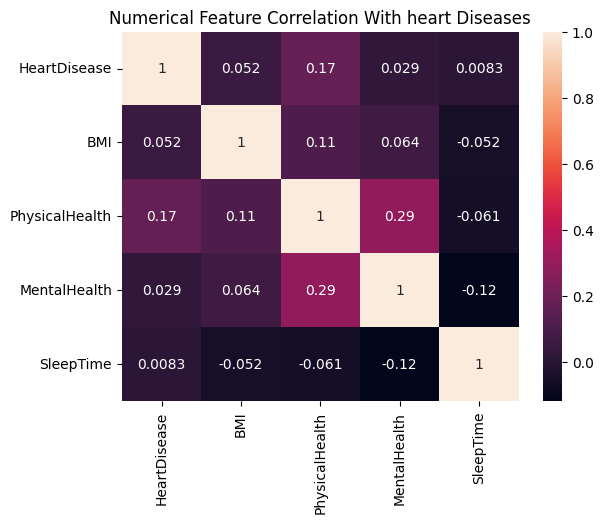

In [23]:
# sn.heatmap(dataset.corr() , annot=True)
tem_data = dataset
tem_data.HeartDisease = tem_data.HeartDisease.astype('category').cat.codes
sn.heatmap(tem_data.corr() , annot=True)
plt.title('Numerical Feature Correlation With heart Diseases')
plt.show()

Observation 





Base on the Numerical Feature Correlation chart, Physicalhealth and Mentalhealth have the highest correlation of 0.29

## Removing duplicates in the dataset 

In [24]:
dataset.drop_duplicates(inplace = True)
dataset.shape

(301717, 18)

<h3 style='color:black; align:left' align='left'> Coverting object DATA type attribute to categorical for easy encoding to numerical representation </h3>

In [25]:
# getting column with 20 value count threshold and then checking thier infomations
# # viewing essentail information about the dataset using the info() method .... information reveal include  
# . columns
# . Non-Null : Number of Values 
# . Dtype : Data type 
col , uni_count , val = get_attribute_unique_threshold(dt, 20)
dt[col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   HeartDisease      301717 non-null  int8  
 1   Smoking           301717 non-null  object
 2   AlcoholDrinking   301717 non-null  object
 3   Stroke            301717 non-null  object
 4   DiffWalking       301717 non-null  object
 5   Sex               301717 non-null  object
 6   AgeCategory       301717 non-null  object
 7   Race              301717 non-null  object
 8   Diabetic          301717 non-null  object
 9   PhysicalActivity  301717 non-null  object
 10  GenHealth         301717 non-null  object
 11  Asthma            301717 non-null  object
 12  KidneyDisease     301717 non-null  object
 13  SkinCancer        301717 non-null  object
dtypes: int8(1), object(13)
memory usage: 32.5+ MB


## Viewing the Categorical Data type conversion outcome

In [26]:
# converting the object type columns into categorical type 
# this makes it easy to categorically map those columns value to unique numerical value
dt[col] = dt[col].astype('category')
dt[col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   HeartDisease      301717 non-null  category
 1   Smoking           301717 non-null  category
 2   AlcoholDrinking   301717 non-null  category
 3   Stroke            301717 non-null  category
 4   DiffWalking       301717 non-null  category
 5   Sex               301717 non-null  category
 6   AgeCategory       301717 non-null  category
 7   Race              301717 non-null  category
 8   Diabetic          301717 non-null  category
 9   PhysicalActivity  301717 non-null  category
 10  GenHealth         301717 non-null  category
 11  Asthma            301717 non-null  category
 12  KidneyDisease     301717 non-null  category
 13  SkinCancer        301717 non-null  category
dtypes: category(14)
memory usage: 6.3 MB


<h3 style='color:black; align:left' align='left'>CONVERTING CATEGORY TYPE INTO RESPECTIVE NUMERIC CODE </h3>

In [27]:
# encoding the neccessary columns into numerical representation 
for c in col:
    dt[c] = dt[c].cat.codes
    
dt.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0


## information about the encoded features into number type (int8)

In [28]:
# showing the attribute data type after convertion to integers (numeric representation)
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int8   
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int8   
 3   AlcoholDrinking   301717 non-null  int8   
 4   Stroke            301717 non-null  int8   
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  int8   
 8   Sex               301717 non-null  int8   
 9   AgeCategory       301717 non-null  int8   
 10  Race              301717 non-null  int8   
 11  Diabetic          301717 non-null  int8   
 12  PhysicalActivity  301717 non-null  int8   
 13  GenHealth         301717 non-null  int8   
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  int8   
 16  KidneyDisease     30


### Viewing the relationship between features in percentage using confusion Matrix (correlation mapping )

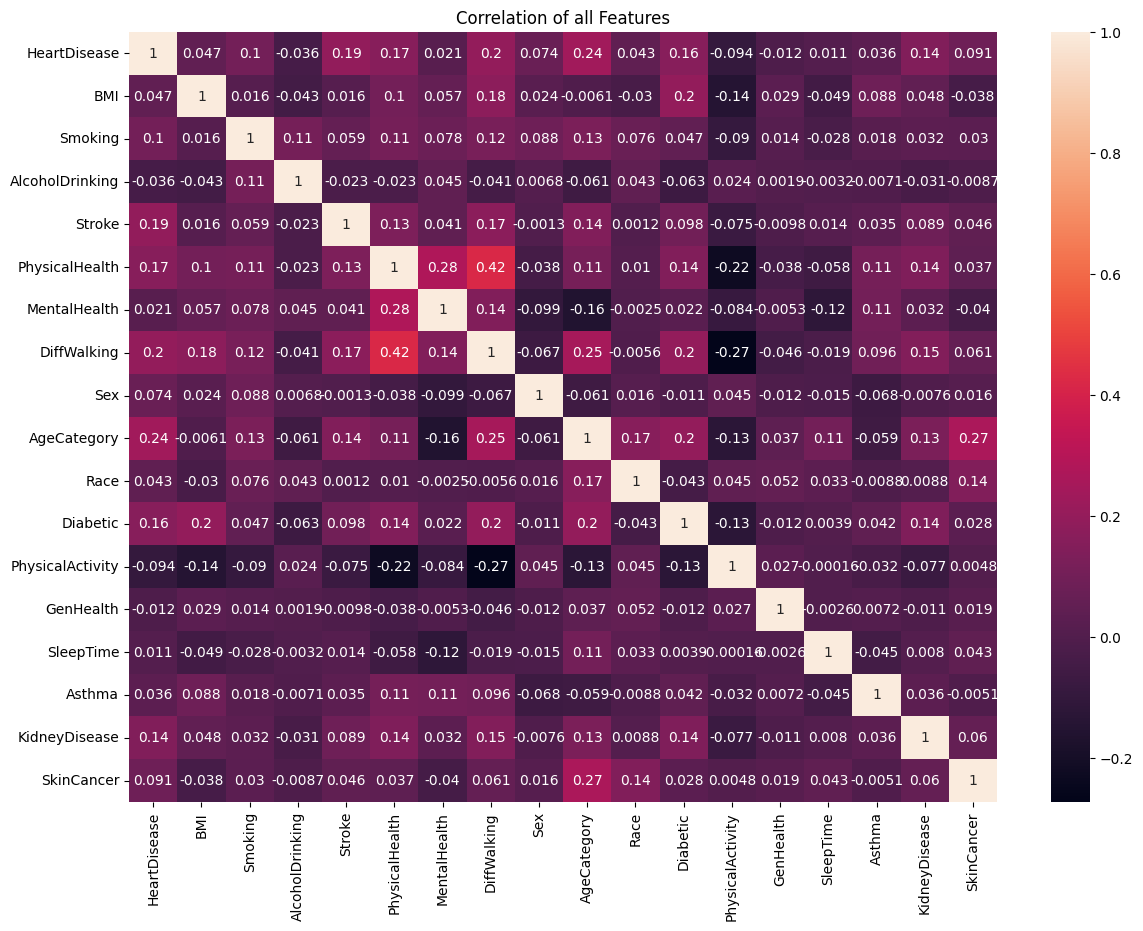

In [29]:
import seaborn as sn 

# using the seaborn module to visualize the percentage level of correlation between the attributes ....
plt.figure(figsize=(14, 10))
sn.heatmap(dt.corr(), annot=True)
plt.title('Correlation of all Features')
plt.show()

Key Observation
<hr>
the chart revealed that PhysicalHealth have the highest Correlation Features with difficuty walking compare to other features
 <br>

## DATA SCALLING USING MIN MAX SCALE APPROACH

In [30]:
from sklearn.preprocessing import MinMaxScaler

# scalling of data to reduce data distribution of certain columsn (BMI, PhysicalHealth)
# min max scaler approach is used ... 
min_max = MinMaxScaler()
dt[['BMI','PhysicalHealth','MentalHealth','SleepTime', 'GenHealth']] = \
            min_max.fit_transform(dt[['BMI','PhysicalHealth','MentalHealth','SleepTime', 'GenHealth']])
dt

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.055294,1,0,0,0.100000,1.0,0,0,7,5,2,1,1.00,0.173913,1,0,1
1,0,0.100447,0,0,1,0.000000,0.0,0,0,12,5,0,1,1.00,0.260870,0,0,0
2,0,0.175782,1,0,0,0.666667,1.0,0,1,9,5,2,1,0.25,0.304348,1,0,0
3,0,0.147169,0,0,0,0.000000,0.0,0,0,11,5,0,0,0.50,0.217391,0,0,1
4,0,0.141132,0,0,0,0.933333,0.0,1,0,4,5,0,1,1.00,0.304348,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.185802,1,0,0,0.233333,0.0,1,1,8,3,2,0,0.25,0.217391,1,0,0
319791,0,0.215139,1,0,0,0.000000,0.0,0,1,3,3,0,1,1.00,0.173913,1,0,0
319792,0,0.147531,0,0,0,0.000000,0.0,0,0,5,3,0,1,0.50,0.217391,0,0,0
319793,0,0.250996,0,0,0,0.000000,0.0,0,0,1,3,0,0,0.50,0.478261,0,0,0


## Heart Disease Data Splitting (80%-20%) 

In [31]:
# extracting the output variable (Y) and the input variable (X)
y = dt.HeartDisease
X = dt.drop(columns=['HeartDisease'])

In [32]:
# splitting the dataset into 80% training sample and 20% testing sample
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# show the splited data value count
print('Training Set 80%')
print('_________________________')
print(f'X train {len(X_train)}')
print(f'y Train {len(y_train)}\n')
print('=================================')
print('Testing Set 20%')
print('_________________________')
print(f'X Test {len(X_test)}')
print(f'y Test {len(y_test)}')

Training Set 80%
_________________________
X train 241373
y Train 241373

Testing Set 20%
_________________________
X Test 60344
y Test 60344


In [33]:
rdforest = RandomForestClassifier()
rdf_model = rdforest.fit(X_train, y_train)
rdf_model

RandomForestClassifier()

In [36]:
import shap
explainer = shap.Explainer(rdf_model)
shap_val = explainer(X_train[:20])

In [ ]:
import numpy as np 
np.shape(sha_val)

## Machine Learning Models

<ol style='color:black'>
    <li> Logistic Regression </li>
    <li> Gussian Naive Bayes  </li>
    <li> Random Forest </li>
    <li> AdaBoost Classifer </li>
    
   </ol>
   
    The models were chose base on the dataset which contains two distinct class (Yes=1 and No = 0) hence, a binary classifiaction problem

## Logistic Regression

In [ ]:
#  Logistic Regression model was adopted to first classifier the unbalance dataset
#  the algorithm is adopted becuase is one of the best use to address binary classification problem


# Initializing logistic regression  
lr  = LogisticRegression()

# training of LR model
lr_model = lr.fit(X_train , y_train)

# checking the accuracy score.... 
lr_accuracy = lr_model.score(X_test, y_test)

print('====================================================================================================')
print(f'            {str(lr_model)[:-2]} Machine Learning Algorithm : Accuracy -> {lr_accuracy}')
print('====================================================================================================')

In [ ]:
# Evaluating the logistic regression model 
prediction = lr_model.predict(X_test)
rpt = metrics.classification_report(y_test, prediction)
cm = metrics.confusion_matrix(y_test, prediction)
lr_pre, lr_recall = precision = metrics.precision_score(y_test, prediction) , metrics.recall_score(y_test, prediction)

print('======================================= CLASSIFICATION REPORT ==================================')
print(rpt)

print('\n\n======================================= CONFUSION MATRIX =======================================')
plt.title(f'{str(lr_model)} Confussion Matric')
sn.heatmap(cm, annot=True, fmt='d' )
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

In [ ]:
# visualizing the ROC curve metric
prob_pred = lr_model.predict_proba(X_test)[::, 1]
fpr , tpr, th = metrics.roc_curve(y_test, prob_pred)

plt.title('ROC (Reciever Operating Character Curve)')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

## Generic Function for Model training and evaluation

In [33]:
# building a generalize/customize method for training the  machine learning models
# evaluating and visualizing scores,  showing classification report, confusion matrix and ROC curve 
# this will avoid repition of codes

y = dt.HeartDisease
X = dt.drop(columns=['HeartDisease'])

def compile_ml_model(model, X, y, labels, cr=True, confmatix=True, roc=True): 
    
#     DATA SPLITING 
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

    print('Training Set 80%')
    print('_________________________')
    print(f'X train {len(X_train)}')
    print(f'y Train {len(y_train)}\n')
    print('=================================')
    print('Testing Set 20%')
    print('_________________________')
    print(f'X Test {len(X_test)}')
    print(f'y Test {len(y_test)}')
    
#     MODEL TRAINING
    ml_model  = model
    ml_model = ml_model.fit(X_train , y_train)
    accuracy = ml_model.score(X_test, y_test)
    print('====================================================================================================')
    print(f'            {str(ml_model)[:-2]} Machine Learning Algorithm : Accuracy -> {accuracy}')
    print('====================================================================================================')
    
#     MODEL EVALUTAION 
    prediction = ml_model.predict(X_test)
    rpt = metrics.classification_report(y_test, prediction)
    cm = metrics.confusion_matrix(y_test, prediction)
    precision , recall = metrics.precision_score(y_test, prediction) , metrics.recall_score(y_test, prediction)
    
#     CHECKING CLASSIFICATION REPORT CONDITION
    if cr: 
        print('======================================= CLASSIFICATION REPORT ==================================')
        print(rpt)

 #     CHECKING CONFUSION MATRIX REPORT CONDITION
    if confmatix:
        print('\n\n======================================= CONFUSION MATRIX =======================================')
        plt.title(f'{str(ml_model)} Confussion Matric')
        sn.heatmap(cm, annot=True, fmt='d' , xticklabels=labels, yticklabels=labels)
        plt.xlabel('Prediction')
        plt.ylabel('Truth')
        plt.show()
        
#     CHECKING ROC REPORT CONDITION
    if roc:
        print('\n\n======================================= ROC CURVE ============================================')
        prob_pred = ml_model.predict_proba(X_test)[::, 1]
        fpr , tpr, th = metrics.roc_curve(y_test, prob_pred)

        plt.title('ROC (Reciever Operating Character Curve)')
        plt.plot(fpr, tpr)
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        
    return accuracy, precision, recall, {'model':ml_model, 'xtrain':X_train, 'xtest': X_test, 'ytrain':y_train, 'ytest': y_test}
    

## Gussian Naive Bayes 

Training Set 80%
_________________________
X train 241373
y Train 241373

Testing Set 20%
_________________________
X Test 60344
y Test 60344
            GaussianNB Machine Learning Algorithm : Accuracy -> 0.8425858411772504
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     54862
           1       0.28      0.45      0.34      5482

    accuracy                           0.84     60344
   macro avg       0.61      0.67      0.63     60344
weighted avg       0.88      0.84      0.86     60344



======================================= CONFUSION MATRIX =======================================


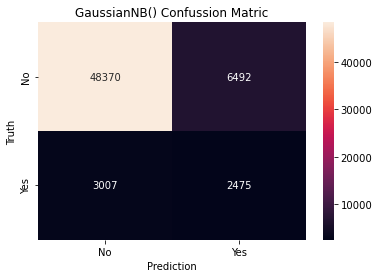



======================================= ROC CURVE ============================================


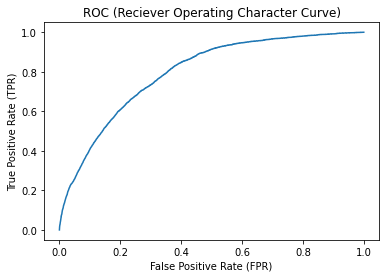

In [39]:
# Naive Bayes has a higher bias and low variance in comparision to Logistic Regression. 
# Results are analyzed to know the data generation making it easier to
# predict with less variables and less data

# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE GUSSIAN NAIVE BAYES 
nb_accuracy , nb_pre, nb_rec, _ = compile_ml_model(GaussianNB(), X, y,  ['No', "Yes"] )

### Random Forest Classifier 

Training Set 80%
_________________________
X train 241373
y Train 241373

Testing Set 20%
_________________________
X Test 60344
y Test 60344
            RandomForestClassifier Machine Learning Algorithm : Accuracy -> 0.9012495028503248
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     55017
           1       0.33      0.12      0.17      5327

    accuracy                           0.90     60344
   macro avg       0.62      0.55      0.56     60344
weighted avg       0.87      0.90      0.88     60344



======================================= CONFUSION MATRIX =======================================


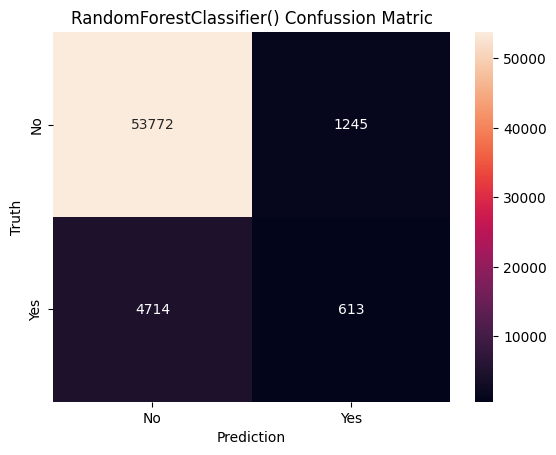



======================================= ROC CURVE ============================================


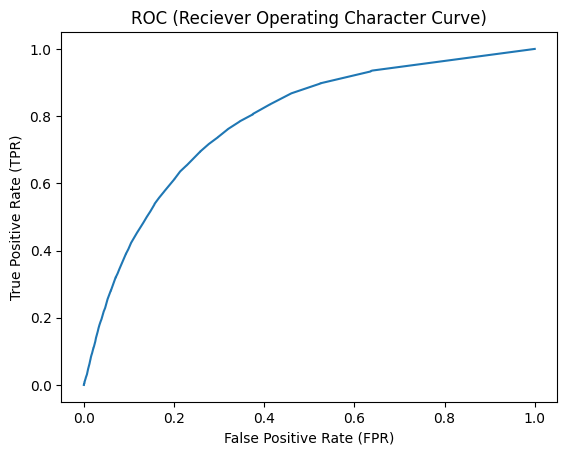

In [34]:
#                                      NOTE
# Random forest is an ensemble machine learning model.. and its adopted because it works well with 
#                             unbalance type of data.....

# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE RANDOM FOREST CLASSIFIER
rdf_acuracy, rdf_pre, rdf_recall, rfc_model = compile_ml_model(RandomForestClassifier(), X, y, ['No', "Yes"] )

In [ ]:
# rfc_model['xtest']

In [38]:
# features = ['Sex', 'AgeCategory', 'Race']
# randforest = RandomForestClassifier()
# rdfmodel = randforest.fit(X_train[features], y_train)
# lr_explainer = shap.TreeExplainer(rdfmodel)

# rfc_instance = X_train.iloc[0][features]
# lr_shape_value = lr_explainer.shap_values(rfc_instance)
# shap.summary_plot(lr_shape_value, features=rfc_instance, feature_names=features, plot_type='bar')

### Ada Boost Classifier 

Training Set 80%
_________________________
X train 241373
y Train 241373

Testing Set 20%
_________________________
X Test 60344
y Test 60344
            AdaBoostClassifier Machine Learning Algorithm : Accuracy -> 0.9111759246983958
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54926
           1       0.52      0.11      0.19      5418

    accuracy                           0.91     60344
   macro avg       0.72      0.55      0.57     60344
weighted avg       0.88      0.91      0.88     60344



======================================= CONFUSION MATRIX =======================================


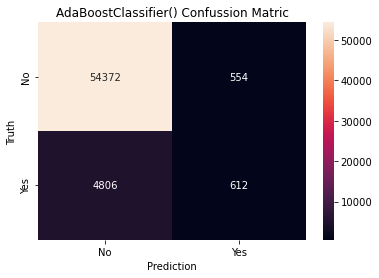



======================================= ROC CURVE ============================================


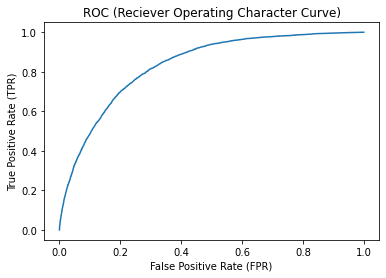

In [41]:
# Adaboost is less prone to overfitting as the input parameters are not jointly optimized. 
# The accuracy of weak classifiers can be improved by using Adaboost
# let see is performance in comparision to random forest classfier

# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE ADABOOST CLASSIFIER
ada_accuracy, ada_pre, ada_rec, clf_ada = compile_ml_model(AdaBoostClassifier(), X, y, ['No', "Yes"] )

  OBSERVATIONS 
  
 the logistic regression algorithm perform better than naive bayes algorithm by handling the unbalance 
 class of the dataset. it can been seen that the accuracy of the minority class for logistic
 regression is better than that of naive bayes 
 Logistic Regression also outpeform the Random forest except Adaboost

 it can be agreed that both logistic and Adaboost are capable of performing well with unbalance dataset 
 in comparision to other Machine learning considered

## Result Summary for ML and UNBalanced dataset

In [42]:
results = pd.DataFrame({
    'Model':['logistic regression','Gussian Naive Bayes', 'Random Forest', 'AdaBoost Classifier'],
    'Score':[lr_accuracy, nb_accuracy, rdf_acuracy, ada_accuracy], 
    'precision':[lr_pre, nb_pre, rdf_pre, ada_pre], 
    'recall':[lr_recall, nb_rec, rdf_recall, ada_rec]}) 

results

,Model,Score,precision,recall
0,logistic regression,0.909154,0.506878,0.087170
1,Gussian Naive Bayes,0.842586,0.276012,0.451478
2,Random Forest,0.898316,0.332993,0.118935
3,AdaBoost Classifier,0.911176,0.524871,0.112957


## Enhancing Dataset  (Using Over Sample Balancing Techniques and Data Scalling)

# DATA BALANCING

## Data Balancing using SMOTE Techniques

<h2 style='color:green'>What is SMOTE?</h2>
<ol>
<li>
SMOTE stands for Synthetic Minority Over-sampling Technique.</li>
<li>It is an over-sampling technique in which new synthetic observations are created using the existing samples of the minority class.</li>
<li>It generates virtual training records by linear interpolation for the minority class.</li>
<li>After the oversampling process, the data is reconstructed, and several classification models can be applied for the processed data.</li>
</ol

<h3 style='color:black; font-family:taoma'> Machine Learning Algorithm  <b> + </b> Data balancing (SMOTE) </h3>


<ol style='color:blue'>
    <li> Logistic Regression </li>
    <li> Gussian Naive Bayes  </li>
    <li> Random Forest </li>
    <li> AdaBoost Classifer </li>
    
</ol>

In [43]:
from imblearn.over_sampling import SMOTE

# DUE TO THE UNBALANCE NATURE OF THE DATASET AVAILAIBLE ITS IMPORTANT TO BALANCE THE DATASET TO AVOID BIAS PREDICTION 

# initializing the SMOTE Technique ... 
smote = SMOTE(sampling_strategy='minority')
x_balanced , y_balanced = smote.fit_resample(X, y)

# checking if the SMOTE sample balance the data...  
y_balanced.value_counts()

0    274456
1    274456
Name: HeartDisease, dtype: int64

## Visualizing Balance Data

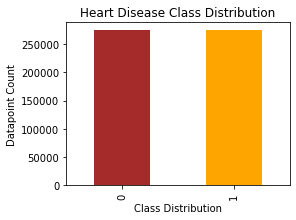

In [44]:
# visualizing the balanced data
y_balanced.value_counts().plot(kind='bar', title= f'Heart Disease Class Distribution', color=['brown', 'orange'], figsize=(4,3))
plt.xlabel('Class Distribution')
plt.ylabel('Datapoint Count')
plt.grid(False)
plt.show()

## LogisticRegression 

Training Set 80%
_________________________
X train 439129
y Train 439129

Testing Set 20%
_________________________
X Test 109783
y Test 109783
            LogisticRegression Machine Learning Algorithm : Accuracy -> 0.7396591457693814
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     54779
           1       0.73      0.77      0.75     55004

    accuracy                           0.74    109783
   macro avg       0.74      0.74      0.74    109783
weighted avg       0.74      0.74      0.74    109783



======================================= CONFUSION MATRIX =======================================


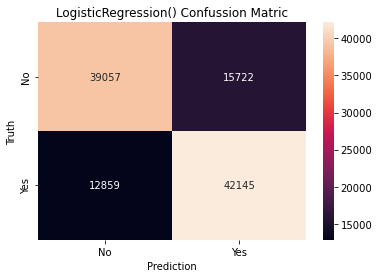



======================================= ROC CURVE ============================================


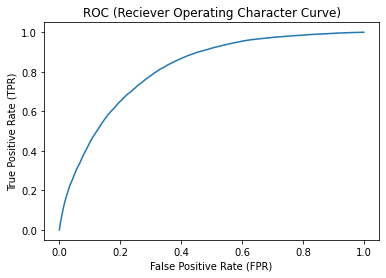

In [45]:
#  using the balance dataset to train the logistic regression 
#  according to the previous prediction its identify that the  accuracy for each class is unqual 
# the 0==> NO class has lower prediction accuracy due to lower number of datapoint in that class

# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE LOGISTIC REGRESSION MODEL - USING BALANCED DATA
lr_accuray_smote, lr_sm_pre, lr_sm_rec, _= compile_ml_model(LogisticRegression(), x_balanced, y_balanced, ['No', "Yes"], confmatix=True )

In [46]:
lr_accuray_smote

0.7396591457693814

## Naive Bayesian Classifier

Training Set 80%
_________________________
X train 439129
y Train 439129

Testing Set 20%
_________________________
X Test 109783
y Test 109783
            GaussianNB Machine Learning Algorithm : Accuracy -> 0.7027864059098403
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.67      0.78      0.72     54496
           1       0.74      0.62      0.68     55287

    accuracy                           0.70    109783
   macro avg       0.71      0.70      0.70    109783
weighted avg       0.71      0.70      0.70    109783



======================================= CONFUSION MATRIX =======================================


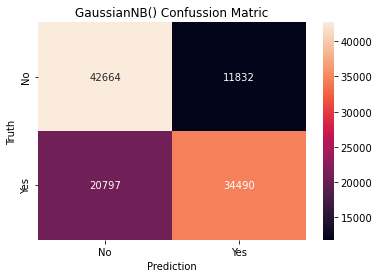

In [47]:
# Naive Bayes has a higher bias and low variance in comparision to Logistic Regression. 
# Results are analyzed to know the data generation making it easier to
# predict with less variables and less data

# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE NAIVE BAYESIAN CLASSIFIER - USING BALANCED DATA
nb_accuracy_smote, nb_sm_pre, nb_sm_rec = compile_ml_model(GaussianNB(), x_balanced, y_balanced, ['No', "Yes"], confmatix=True, roc=False  )

## Random forest Classifier

Training Set 80%
_________________________
X train 439129
y Train 439129

Testing Set 20%
_________________________
X Test 109783
y Test 109783
            RandomForestClassifier Machine Learning Algorithm : Accuracy -> 0.9161801007441953
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     54760
           1       0.92      0.92      0.92     55023

    accuracy                           0.92    109783
   macro avg       0.92      0.92      0.92    109783
weighted avg       0.92      0.92      0.92    109783



======================================= CONFUSION MATRIX =======================================


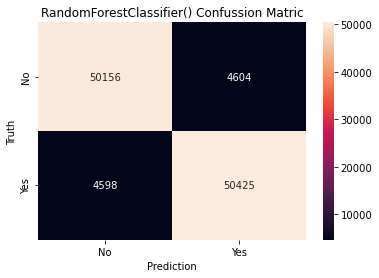



======================================= ROC CURVE ============================================


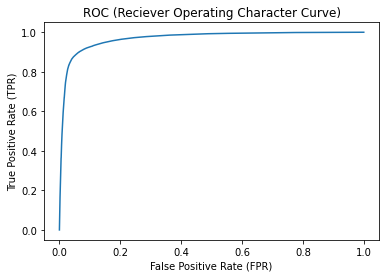

In [48]:
# let experiment on random forest again and see it performance with balance dataset 
#  there is high probability of high performance with the balance data
# becuse it work well will unbalance data initailly.

# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE RANDOM FOREST CLASSIFIER - USING BALANCED DATA
rdf_acuracy_smote, rf_sm_pre, rf_sm_rec, _ = compile_ml_model(RandomForestClassifier(), x_balanced, y_balanced , ['No', "Yes"], confmatix=True)

## AdaBoost Classifier

Training Set 80%
_________________________
X train 439129
y Train 439129

Testing Set 20%
_________________________
X Test 109783
y Test 109783
            AdaBoostClassifier Machine Learning Algorithm : Accuracy -> 0.8302833772077645
======================================= CLASSIFICATION REPORT ==================================
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     54993
           1       0.83      0.83      0.83     54790

    accuracy                           0.83    109783
   macro avg       0.83      0.83      0.83    109783
weighted avg       0.83      0.83      0.83    109783



======================================= CONFUSION MATRIX =======================================


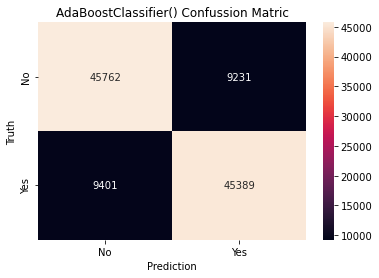



======================================= ROC CURVE ============================================


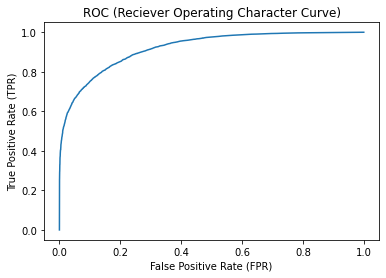

In [49]:
# Adaboost is less prone to overfitting as the input parameters are not jointly optimized. 
# The accuracy of weak classifiers can be improved by using Adaboost

# AdaBoostClassifier
# CALLING THE GENERIC METHOD... FOR TRAINING AND EVALUATING THE ADA-BOOST CLASSIFIER - USING BALANCED DATA
ada_accuracy_smote, ada_sm_pre, ada_sm_rec, _ = compile_ml_model(AdaBoostClassifier(), x_balanced, y_balanced, ['No', "Yes"], confmatix=True)

  OBSERVATION 
 
 The synthetic balancing reduce the pefromance of logistic regression  

 Random Forest Outperform all other models while using the SMOTE Techniques 

 randome forest work well with the balanced data  
    while the logistic regression perform well with the unbalance dataset


# Result summary for machine learning algorithm with SMOTE

In [50]:
results = pd.DataFrame({
    'Model':['logistic regression','Gussian Naive Bayes', 'Random Forest', 'AdaBoost Classifier'],
    'Score':[lr_accuray_smote, nb_accuracy_smote, rdf_acuracy_smote, ada_accuracy_smote], 
    'precision': [lr_sm_pre, nb_sm_pre, rf_sm_pre, ada_sm_pre], 
    'recall':[lr_sm_rec, nb_sm_rec, rf_sm_rec, ada_sm_rec] }) 

results 

,Model,Score,precision,recall
0,logistic regression,0.739659,0.728308,0.766217
1,Gussian Naive Bayes,0.702786,0.744571,0.623836
2,Random Forest,0.916180,0.916335,0.916435
3,AdaBoost Classifier,0.830283,0.830996,0.828418
